### H&M Personalized Fashion Recommendations — 01 EDA

This notebook performs exploratory data analysis (EDA) on the H&M dataset:
- customers.csv
- articles.csv
- transactions_train.csv

#### Step1: Load Dataset

In [23]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 5)
pd.set_option("display.max_rows", 5)

DATA_DIR = "../hm_data"  # 改成你的實際資料夾
os.listdir(DATA_DIR)

['sample_submission.csv',
 'articles.csv',
 'customers.csv',
 'transactions_train.csv']

In [20]:
articles_path = os.path.join(DATA_DIR, "articles.csv")
customers_path = os.path.join(DATA_DIR, "customers.csv")
transactions_path = os.path.join(DATA_DIR, "transactions_train.csv")
sample_submission_path = os.path.join(DATA_DIR, "sample_submission.csv")

articles = pd.read_csv(articles_path)
customers = pd.read_csv(customers_path)
transactions = pd.read_csv(
    transactions_path,
    parse_dates=["t_dat"]
)

print("articles:", articles.shape)
print("customers:", customers.shape)
print("transactions:", transactions.shape)

articles: (105542, 25)
customers: (1371980, 7)
transactions: (31788324, 5)


#### Step2: Overview basic stats

In [25]:
def show_columns(df):
    print(f"Total {len(df.columns)} columns:")
    for col in df.columns:
        print(" -", col)

def show_dtypes(df):
    d = pd.DataFrame(df.dtypes, columns=["dtype"])
    print(d)

def show_missing(df):
    missing = df.isna().mean().sort_values(ascending=False)
    print(missing[missing > 0])

def quick_overview(df, name):
    print(f"\n=== {name} ===")
    print(df.head(1))
    # Get columns
    show_columns(df)
    # Get dtypes
    show_dtypes(df)
    # Check missing values
    show_missing(df)

quick_overview(articles, "articles")
quick_overview(customers, "customers")
quick_overview(transactions, "transactions")


=== articles ===
   article_id  product_code  ... garment_group_name  \
0   108775015        108775  ...       Jersey Basic   

                               detail_desc  
0  Jersey top with narrow shoulder straps.  

[1 rows x 25 columns]
Total 25 columns:
 - article_id
 - product_code
 - prod_name
 - product_type_no
 - product_type_name
 - product_group_name
 - graphical_appearance_no
 - graphical_appearance_name
 - colour_group_code
 - colour_group_name
 - perceived_colour_value_id
 - perceived_colour_value_name
 - perceived_colour_master_id
 - perceived_colour_master_name
 - department_no
 - department_name
 - index_code
 - index_name
 - index_group_no
 - index_group_name
 - section_no
 - section_name
 - garment_group_no
 - garment_group_name
 - detail_desc
                     dtype
article_id           int64
product_code         int64
...                    ...
garment_group_name  object
detail_desc         object

[25 rows x 1 columns]
detail_desc    0.003942
dtype: float64

=

Active                    0.661508
FN                        0.652378
fashion_news_frequency    0.011670
age                       0.011561
club_member_status        0.004418
dtype: float64

=== transactions ===
       t_dat                                        customer_id  article_id  \
0 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   

      price  sales_channel_id  
0  0.050831                 2  
Total 5 columns:
 - t_dat
 - customer_id
 - article_id
 - price
 - sales_channel_id
                           dtype
t_dat             datetime64[ns]
customer_id               object
article_id                 int64
price                    float64
sales_channel_id           int64
Series([], dtype: float64)


#### Step3: EDA on Transaction Data

In [ ]:
print("=== Transaction Date Range ===")
transactions["t_dat"].min(), transactions["t_dat"].max()

=== Date Range ===


(Timestamp('2018-09-20 00:00:00'), Timestamp('2020-09-22 00:00:00'))

=== Number of transactions per day ===


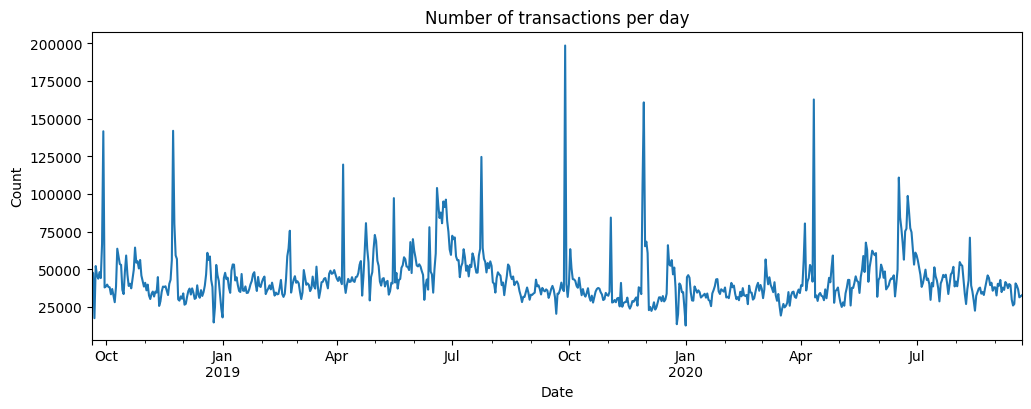

In [28]:
print("=== Number of transactions per day ===")
tx_per_day = transactions.groupby("t_dat")["t_dat"].count()
tx_per_day.plot(figsize=(12,4))
plt.title("Number of transactions per day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

#### Step4: EDA on Customer Data

In [30]:
print("=== How many products each cusomter bought? ===")
tx_per_customer = transactions.groupby("customer_id")["article_id"].count()
print("Customers:", tx_per_customer.shape[0])
print("Mean purchases per customer:", tx_per_customer.mean())
print(tx_per_customer.describe())

=== How many products each cusomter bought? ===


Customers: 1362281
Mean purchases per customer: 23.334630667241193
count    1.362281e+06
mean     2.333463e+01
             ...     
75%      2.700000e+01
max      1.895000e+03
Name: article_id, Length: 8, dtype: float64


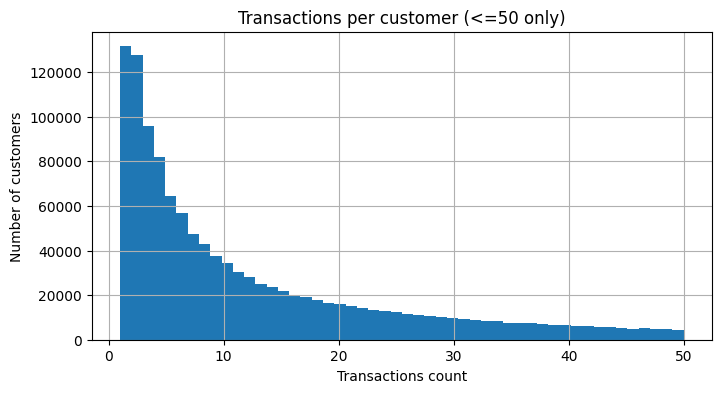

In [39]:
subset = tx_per_customer[tx_per_customer <= 50]
subset.hist(bins=50, figsize=(8, 4))
plt.title("Transactions per customer (<=50 only)")
plt.xlabel("Transactions count")
plt.ylabel("Number of customers")
plt.show()

#### Step5: EDA on Article Data

In [40]:
print("=== How many times was each article purchased? ===")
tx_per_article = transactions.groupby("article_id")["customer_id"].count()
print("Articles in transactions:", tx_per_article.shape[0])
print(tx_per_article.describe())

=== How many times was each article purchased? ===
Articles in transactions: 104547
count    104547.000000
mean        304.057735
             ...      
75%         286.000000
max       50287.000000
Name: customer_id, Length: 8, dtype: float64


=== Popular product distribution ===


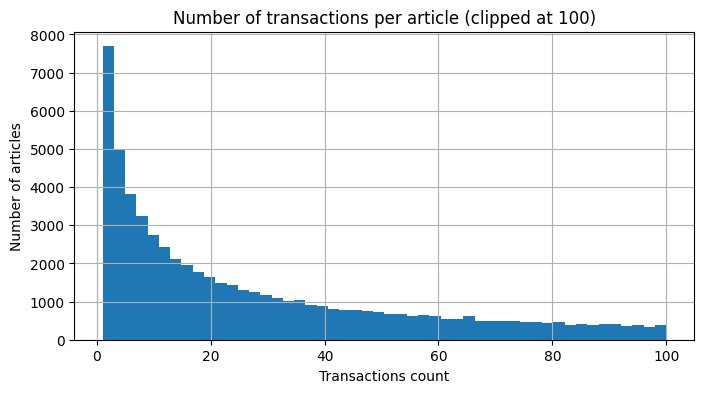

In [42]:
print("=== Popular product distribution ===")
tx_per_article[tx_per_article <= 100].hist(bins=50, figsize=(8,4))
plt.title("Number of transactions per article (clipped at 100)")
plt.xlabel("Transactions count")
plt.ylabel("Number of articles")
plt.show()

In [45]:
print("=== Top 10 Most Purchased Items ===")
top10 = (
    tx_per_article
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"customer_id": "purchase_count"})
)

top10_info = top10.merge(articles, on="article_id", how="left")

top10_info[["article_id", "prod_name", "product_group_name", "purchase_count"]]

=== Top 10 Most Purchased Items ===


,article_id,prod_name,product_group_name,purchase_count
0,706016001,Jade HW Skinny Denim TRS,Garment Lower body,50287
1,706016002,Jade HW Skinny Denim TRS,Garment Lower body,35043
...,...,...,...,...
8,399223001,Curvy Jeggings HW Ankle,Garment Lower body,22236
9,706016003,Jade HW Skinny Denim TRS,Garment Lower body,21241


#### Step6: Articles Metadata

In [46]:
articles["product_type_name"].value_counts().head(5)

product_type_name
Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Name: count, dtype: int64

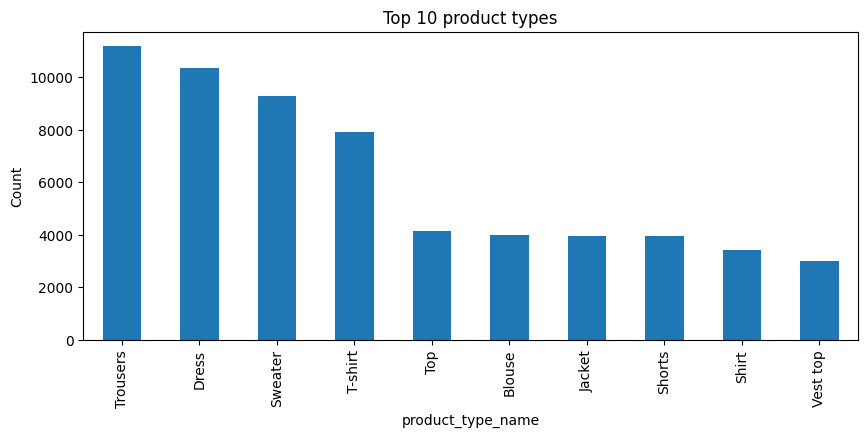

In [52]:
articles["product_type_name"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 product types")
plt.ylabel("Count")
plt.show()

In [48]:
articles["product_group_name"].value_counts().head(5)

product_group_name
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Name: count, dtype: int64

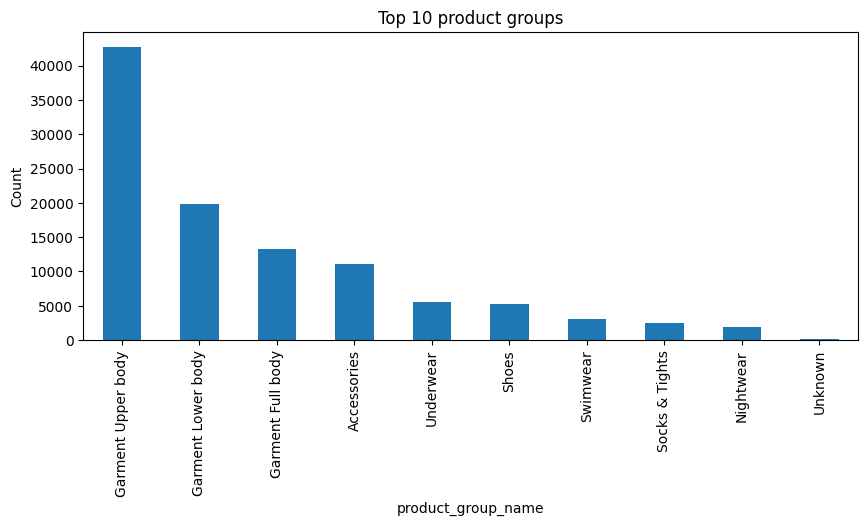

In [53]:
articles["product_group_name"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 product groups")
plt.ylabel("Count")
plt.show()

In [49]:
articles["section_name"].value_counts().head(5)

section_name
Womens Everyday Collection       7295
Divided Collection               7124
Baby Essentials & Complements    4932
Kids Girl                        4469
Young Girl                       3899
Name: count, dtype: int64

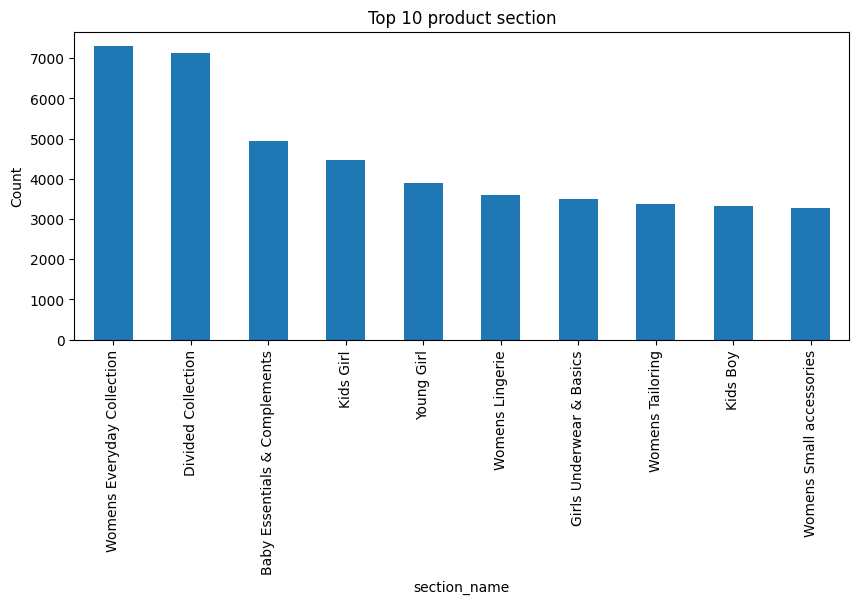

In [54]:
articles["section_name"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 product section")
plt.ylabel("Count")
plt.show()

In [50]:
articles["garment_group_name"].value_counts().head(5)

garment_group_name
Jersey Fancy         21445
Accessories          11519
Jersey Basic          8126
Knitwear              7490
Under-, Nightwear     7441
Name: count, dtype: int64

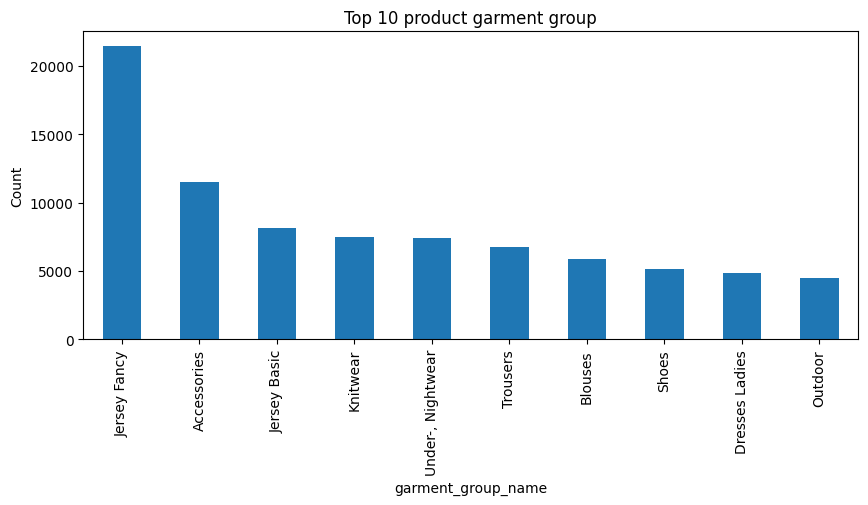

In [55]:
articles["garment_group_name"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 product garment group")
plt.ylabel("Count")
plt.show()

#### Step7: Customers Metadata

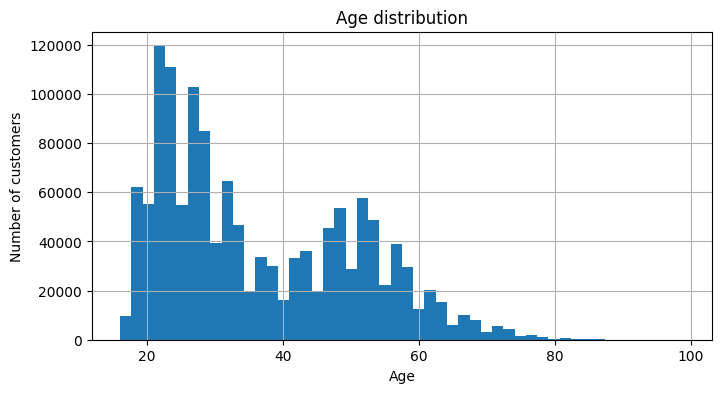

In [56]:
customers["age"].hist(bins=50, figsize=(8,4))
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

In [59]:
print("=== Member Status ===")
customers["club_member_status"].value_counts(dropna=False)

=== Member Status ===


club_member_status
ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: count, dtype: int64

In [60]:
print("=== News subscription ===")
customers["fashion_news_frequency"].value_counts(dropna=False)

=== News subscription ===


fashion_news_frequency
NONE         877711
Regularly    477416
NaN           16011
Monthly         842
Name: count, dtype: int64

#### Step8: user–item merge samples

In [61]:
sample_tx = transactions.sample(100_000, random_state=42)

sample_merged = (sample_tx
                 .merge(customers, on="customer_id", how="left")
                 .merge(articles, on="article_id", how="left"))

sample_merged.head()


,t_dat,customer_id,...,garment_group_name,detail_desc
0,2019-09-13,215895f90002eb3d1a04bd603513c8e85e6002ef08f136...,...,Jersey Fancy,Jazz trousers in sturdy cotton jersey with wid...
1,2019-02-23,7b183268e3a4623b80d5325ec4a20a0af0edff7bcb1748...,...,"Under-, Nightwear","Pyjamas in soft, jacquard-weave viscose. Top w..."
2,2019-07-17,2eb7412239a90c0570cd3d1bf0492856ae5b59058b1ea6...,...,Swimwear,Fully lined shaping swimsuit that has a sculpt...
3,2019-05-16,74f162e5a170fd57207aa2a7d5c58479ee9de903b2a277...,...,Blouses,Off-the-shoulder blouse in an airy viscose wea...
4,2019-08-10,aab9306ee28c4db494003955f80355e540b01480ab35cf...,...,Trousers,Trousers in stretch cotton twill with a high w...


## Summary of EDA

- The dataset contains **1371980 customers, 105542 unique articles, and 31788324 transactions** between **2018-09-20 and 2020-09-22**. 
- Most customers have relatively few transactions, while a small number of heavy users account for a large portion of total sales, reflecting a **typical long-tail distribution**.
- Article popularity is also highly skewed: a small subset of items is purchased disproportionately often compared to the majority of articles.
- The transaction timeline exhibits a **strong weekly pattern**, with transaction volume rising and falling in a regular 7-day cycle.
- Several **large irregular spikes** are present in the timeline, likely corresponding to promotional events or major sales campaigns (e.g., Black Friday).
- There is **no clear long-term seasonal trend** across months or years—the baseline transaction volume remains relatively stable.
- These temporal characteristics suggest that **time-aware features** (e.g., recency, day-of-week, event-related spikes, or time-decay weighting) may improve both the recall and ranking stages of the recommendation model.
- Articles are organized into hierarchical metadata categories—such as **product groups, sections, and garment groups**—which provide rich item-level information for feature engineering.
- Customer metadata, including **age, club_member_status, and fashion_news_frequency**, shows clear structure and variability, and can be leveraged to model user preferences.